[![Abrir en Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/UxuSS/reutilizacion/blob/main/Tutorial_API_Eustat_R_es.ipynb)

 **Introducción**

Este tutorial pretende servir de ayuda para las personas que quieran realizar consultas y obtener datos de la web de Eustat vía API. Se muestran ejemplos reales de uso del servicio web de datos abiertos y el código R necesario para ejecutar las acciones. Se utilizan varios paquetes de R para recibir información de la web, leer y tratar datos en formato *json*.

In [3]:
install.packages(c("httr", "jsonlite", "dplyr", "rjstat", "ggplot2"))
library(httr)
library(jsonlite)
library(dplyr)
library(rjstat)
library(ggplot2)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Obtener el catálogo de datos de Eustat**

Los datos a los que se puede acceder vía API son los que se encuentran en el [banco de datos de Eustat](https://www.eustat.eus/banku/indexArbol.html).

Es posible acceder al listado completo de los conjuntos de datos a través de su servicio web. En este ejemplo se presentan solo los primeros registros del catálogo.

In [14]:
DB <- GET("https://www.eustat.eus/bankupx/api/v1/es/DB")
Catálogo <- fromJSON(rawToChar(DB$content))
head(Catálogo)

,id,type,text,updated
,<chr>,<chr>,<chr>,<chr>
1,PX__feinem_inem06.px,t,Paro registrado de la C.A. de Euskadi por ámbitos territoriales y sexo,2021-02-17T10:04:22
2,PX__fepycl_pc02cm.px,t,Índice general de precios al consumo (IPC) por Territorio Histórico de la C.A. de Euskadi por índice y mes. Base 2016 (desde 2002),2021-02-16T11:15:00
3,PX_0_fepycl_pc02cm.px,t,Índice general de precios al consumo (IPC) por Territorio Histórico de la C.A. de Euskadi por índice y mes. Base 2016 (desde 2002),2021-05-14T08:28:37
4,PX_0_fepycl_pc02m.px,t,Índice general de precios al consumo (IPC) de la C.A. de Euskadi y del Estado por índice y mes. Base 2016 (desde 2002),2021-05-14T08:28:37
5,PX_010121_cesce_esce01.px,t,"Población de la C.A. de Euskadi por territorio histórico, sexo, grupo de edad cumplida y escenario. 2050",2021-02-10T11:10:41
6,PX_010121_cesce_esce01b.px,t,"Población de la C.A. de Euskadi por territorio histórico, sexo, grupo de edad cumplida y escenario. 2061",2021-02-10T12:21:50


**Idiomas**

Se pueden obtener los mismos datos en euskera o en inglés. Solo hay que modificar la dirección de la *url* en la parte que contiene el idioma, `www.eustat.eus/bankupx/api/v1/[idioma]/DB`, y reemplazar *es* por *eu* o *en*. Por ejemplo, en euskera sería así:




In [15]:
DB <- GET("https://www.eustat.eus/bankupx/api/v1/eu/DB")
Katalogoa <- fromJSON(rawToChar(DB$content))
head(Katalogoa)

,id,type,text,updated
,<chr>,<chr>,<chr>,<chr>
1,PX__feinem_inem06.px,t,"Euskal AEko erregistratutako langabezia, lurralde eremuaren eta sexuaren arabera",2021-02-17T10:04:22
2,PX__fepycl_pc02cm.px,t,"Euskal AEko eta Estatuko kontsumorako prezioen indize orokorra (KPI), Lurralde Historikoaren, indizearen eta hilaren arabera. Oinarria 2016 (2002tik)",2021-02-16T11:15:00
3,PX_0_fepycl_pc02cm.px,t,"Euskal AEko eta Estatuko kontsumorako prezioen indize orokorra (KPI), Lurralde Historikoaren, indizearen eta hilaren arabera. Oinarria 2016 (2002tik)",2021-05-14T08:28:37
4,PX_0_fepycl_pc02m.px,t,"Euskal AEko eta Estatuko kontsumorako prezioen indize orokorra (KPI), indizearen eta hilaren arabera. Oinarria 2016 (2002tik)",2021-05-14T08:28:37
5,PX_010121_cesce_esce01.px,t,"Euskal AEko biztanleria, eszenategiaren, lurraldearen, sexuaren eta adin-beteko taldeen arabera. 2050",2021-02-10T11:10:41
6,PX_010121_cesce_esce01b.px,t,"Euskal AEko biztanleria, eszenategiaren, lurraldearen, sexuaren eta adin-beteko taldeen arabera. 2061",2021-02-10T12:21:50


**Busqueda de un conjunto de datos de interés**

Podemos hacer búsquedas en este índice o tabla de contenidos para identificar los datos que nos interesan. Podemos, por ejemplo, buscar aquellos conjuntos de datos que hagan referencia al paro.

In [16]:
id_paro <- Catálogo %>% filter(grepl("paro", text))
id_paro

id,type,text,updated
<chr>,<chr>,<chr>,<chr>
PX_010152_cepv2_pp03.px,t,"Tasa de paro de la población de 16 y más años de la C.A. de Euskadi por territorio, edad y sexo",2021-02-10T11:02:49
PX_010152_cepv2_pp04a.px,t,Tasa de paro de la población de 16 y más años de la C.A. de Euskadi por ámbitos territoriales y sexo,2021-02-10T11:25:00
PX_050403_cpra_tab01.px,t,"Tasas de actividad, ocupación y paro de la población de 16 y más años de la C.A. de Euskadi por territorio histórico, sexo y trimestre (%)",2021-04-23T07:56:46
PX_050403_cpra_tab02.px,t,"Tasas de actividad, ocupación y paro de la población de 16 y más años de la C.A. de Euskadi por territorio histórico, edad y trimestre (%)",2021-04-23T07:56:45
PX_050403_cpra_tab03.px,t,"Tasas de actividad, ocupación y paro de la población de 16 y más años de la C.A. de Euskadi por territorio histórico, nivel instrucción y trimestre (%)",2021-04-23T07:56:46
PX_050403_cpra_tab14.px,t,"Tasas de actividad, ocupación y paro de la población de 16 y más años de la C.A. de Euskadi por territorio histórico, nivel de estudios terminados y trimestre (%)",2021-04-23T07:56:45
PX_050403_cpra_tab17.px,t,"Tasas de actividad, ocupación y paro de la población de 16 y más años de la C.A. de Euskadi por territorio histórico, nacionalidad y trimestre (%)",2021-04-23T07:56:45
PX_050403_cpra_tab19.px,t,"Tasas de actividad, ocupación y paro de la población de 16 y más años de la C.A. de Euskadi por capitales, sexo y trimestre (%)",2021-04-23T07:56:44
PX_050404_femt_cen01.px,t,"Tasa de actividad, tasa de paro y coeficiente de ocupación de la población de 16 a 64 años de la C.A. de Euskadi por comarca (11 comarcas)",2021-02-10T11:15:05


El campo "id" contiene la dirección en la que se encuentran los datos dentro del banco de datos de Eustat. "type" indica el formato en el que se encuentran los datos, siendo "t" una tabla, y "text" es la descripción del conjunto de datos. El campo "updated" contiene la fecha de la última publicación del conjunto de datos. ***Atención! la fecha de última actualización no está bien recogida***

**Ordenar el Índice o tabla de contenidos**

Se puede ordenar la tabla de contenidos por la fecha de última publicación, para saber cuáles son los datos más recientes en la web de Eustat. ***Atención! la fecha de última actualización no está bien recogida***


In [17]:
Catálogo_ordenado <- Catálogo %>% arrange(desc(updated))
head(Catálogo_ordenado)

,id,type,text,updated
,<chr>,<chr>,<chr>,<chr>
1,PX_112312_cipi_ipi1m_igcdb.px,t,"Índice de producción industrial de la C.A. de Euskadi por territorio histórico, tipo de serie, índice y mes",2021-06-03T07:58:27
2,PX_112312_cipi_ipi1m_38cdb.px,t,"Índice de producción industrial de la C.A. de Euskadi por sector (A38), tipo de serie, índice y mes",2021-06-03T07:58:26
3,PX_112312_cipi_ipi1m_dcdb.px,t,"Índice de producción industrial de la C.A. de Euskadi por territorio histórico, destino económico de los bienes, tipo de serie, índice y mes",2021-06-03T07:58:26
4,PX_112312_cipi_ipi1m_21cdb.px,t,"Índice de producción industrial de la C.A. de Euskadi por territorio histórico, sector (A21), tipo de serie, índice y mes",2021-06-03T07:58:25
5,PX_133000_chost_hos03b.px,t,"Macromagnitudes de la C.A. de Euskadi por principales agregados, territorio histórico y grupo CNAE-09 (miles de euros)",2021-06-02T08:07:22
6,PX_133000_chost_hos04b.px,t,"Cuenta de pérdidas y ganancias de la C.A. de Euskadi por principales variables, territorio histórico y grupo CNAE-09 (miles de euros)",2021-06-02T08:07:22


**Obtener los metadatos de una tabla**

El banco de datos público de Eustat está estructurado en los metadatos por un lado y los datos por otro. Los metadatos están configurados en forma de árbol jerárquico, y contienen información sobre cuáles son las dimensiones disponibles para los datos de cada tabla y los valores que toman (como código o como texto descriptivo).

Para acceder a los metadatos de una tabla concreta, debemos añadirle a la *url* del banco de datos el "id" de la tabla de interés. La dirección tendrá este aspecto: `www.eustat.eus/bankupx/api/v1/[idioma]/DB/[id]`

Accedemos, por ejemplo, a los metadatos de la tabla que contiene los datos de población de la C.A. de Euskadi por ámbitos territoriales, grupos de edad y sexo, que se encuentra en esta dirección:

https://www.eustat.eus/bankupx/api/v1/es/DB/PX_010154_cepv1_ep06b.px


In [8]:
metadatos<- GET("https://www.eustat.eus/bankupx/api/v1/es/DB/PX_010154_cepv1_ep06b.px")
metadatos_población <- fromJSON(rawToChar(metadatos$content))
metadatos_población

$title
[1] "Población de la C.A. de Euskadi por ámbitos territoriales, grandes grupos de edad cumplida y sexo. 2001/01/01 - 2023/01/01"

$variables
                             code                            text
1           ámbitos territoriales           ámbitos territoriales
2 grandes grupos de edad cumplida grandes grupos de edad cumplida
3                            sexo                            sexo
4                         periodo                         periodo
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              values
1 00001, 01, 48, 20, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 48001, 20001, 48002, 20002, 01051, 20016, 20003, 48911, 20004, 20005, 01001, 20006, 48912, 20906, 20007, 20008, 48003, 48004, 01002, 20009, 20010, 20011, 01049, 48005, 20012, 01003, 48006, 48093, 20013, 01006, 01037, 48009, 20055, 48914, 01008, 48010, 48011, 48023, 48008, 01004, 01009, 20014, 20903, 20015, 48091, 48070, 01010, 20017, 20018, 48012, 20904, 48090, 01011, 48013, 48014, 01013, 48015, 20019, 48092, 20020, 20021, 48016, 01014, 20022, 20074, 48017, 01016, 48018, 48019, 20023, 20024, 48020, 48021, 01017, 20029, 48901, 48026, 20069, 48027, 48028, 20030, 48031, 01021, 01022, 20031, 20033, 20032, 48032, 01023, 48902, 48033, 48034, 20067, 20066, 01046, 48079, 20034, 48029, 48030, 20035, 48906, 48035, 20038, 20037, 48036, 48037, 48038, 48039, 48040, 48041, 20907, 48046, 20039, 48044, 48047, 48042, 48043, 48045, 01056, 20040, 20041, 20036, 20042, 48048, 20043, 48094, 20044, 20045, 01901, 20046, 01027, 48049, 20047, 48910, 48050, 48022, 48907, 01019, 01020, 01028, 01030, 01031, 01032, 48051, 01902, 01033, 48052, 20048, 20902, 01036, 48053, 20049, 20050, 20051, 20052, 01058, 20068, 48054, 48057, 48055, 48056, 01034, 48081, 20053, 20054, 48903, 48058, 48059, 48060, 48061, 20901, 48062, 48063, 48064, 01039, 48066, 48068, 48069, 48007, 48908, 48071, 20057, 20056, 48067, 48909, 01041, 20063, 01042, 20058, 48073, 20059, 20076, 20905, 20060, 20061, 20062, 48075, 48083, 48072, 01043, 20064, 01044, 48077, 48078, 01047, 01052, 01053, 48082, 20070, 48084, 48904, 48085, 48086, 20065, 48076, 20071, 48087, 48088

**Obtener los datos de una tabla**

Para disponer de los datos de las tablas, debemos realizar una consulta a la misma dirección del banco de datos. Utilizamos el paquete *rjstat* para trabajar con los datos que vamos a obtener en formato *json-stat*. En este ejemplo, consultamos todos los datos de la tabla de población por grupos de edad y sexo.

In [9]:
url <- "https://www.eustat.eus/bankupx/api/v1/es/DB/PX_010154_cepv1_ep06b.px"
consulta <- '{"query":[]}'

d.tmp <- POST(url , body = consulta, encode = "json", verbose())
tabla <- fromJSONstat(content(d.tmp, "text"), naming = "label", use_factors = FALSE, silent = FALSE)
Población <- tabla[[1]]
head(Población)

,ámbitos territoriales,grandes grupos de edad cumplida,sexo,periodo,value
,<chr>,<chr>,<chr>,<chr>,<int>
1,C.A. de Euskadi,Total,Total,2001/01/01,2079210
2,C.A. de Euskadi,Total,Total,2002/01/01,2085058
3,C.A. de Euskadi,Total,Total,2003/01/01,2089950
4,C.A. de Euskadi,Total,Total,2004/01/01,2095014
5,C.A. de Euskadi,Total,Total,2005/01/01,2104396
6,C.A. de Euskadi,Total,Total,2006/01/01,2115383


**Obtener los datos de una tabla, con códigos**

Es posible que nos interese disponer de estos datos con los códigos de las variables, y no con el texto o la descripción. En ese caso, solicitamos que los nombres se capturen como código (naming="id") y no como texto (naming="label").

In [10]:
tabla <- fromJSONstat(content(d.tmp, "text"), naming = "id", use_factors = FALSE, silent = FALSE)
Población_codigo <- tabla[[1]]
head(Población_codigo)

,ámbitos territoriales,grandes grupos de edad cumplida,sexo,periodo,value
,<chr>,<chr>,<chr>,<chr>,<int>
1,00001,10,10,20010101,2079210
2,00001,10,10,20020101,2085058
3,00001,10,10,20030101,2089950
4,00001,10,10,20040101,2095014
5,00001,10,10,20050101,2104396
6,00001,10,10,20060101,2115383


En la consulta que hemos realizado hemos pedido todos los datos disponibles, sin seleccionar ningún territorio, grupo de edad, sexo o periodo. Podría pasar que la petición fuera excesiva y se alcance el límite de datos que se pueden recopilar a partir del servicio web.

**Obtener los datos de una tabla, con una consulta de datos**

Cuando nos interesa disponer de los datos de una selección de valores, y no todo el contenido de las tablas, debemos realizar una consulta seleccionando las variables y valores de interés. Esta selección se hace a partir de los códigos de los valores, y no de su nombre. La forma más facil de definir la consulta es desde la propia web de Eustat, donde podremos seleccionar los datos que nos interesan facilmente, y obtener la consulta en formato json.

Por ejemplo, si queremos datos del PIB trimestral por territorio histórico, iríamos a la página en la que se seleccionan las variables para esta tabla del banco de datos:

https://www.eustat.eus/bankupx/pxweb/es/DB/-/PX_170115_ccet_cet04tb.px

Y hacemos la selección que nos interesa: seleccionamos los datos del PIB trimestral en forma de tasa interanual, con datos corregidos de efectos estacionales y de calendario, y medido a precios corrientes en miles de euros.

<img src="https://raw.githubusercontent.com/UxuSS/reutilizacion/main/imagen/PIB_seleccion.png" alt="Selección" width="600">

Tras hacer la selección pulsamos "Continuar" y "Disponer de esta tabla en su aplicación". En este apartado aparecerán tanto la url a la que hay que hacer la petición como la consulta json, que será la que incluiremos en nuestro código.

<img src="https://raw.githubusercontent.com/UxuSS/reutilizacion/main/imagen/PIB_consulta.png" alt="Consulta json" width="600">

In [18]:
url <- "https://www.eustat.eus/bankupx/api/v1/es/DB/PX_170115_ccet_cet04tb.px"
consulta <- '{"query": [{"code": "tipo de dato","selection": {"filter": "item","values": ["20"]}},
            {"code": "tipo de serie","selection": {"filter": "item","values": ["20"]}},
            {"code": "tipo de medida", "selection": {"filter": "item","values": ["20"]}}],
            "response": {"format": "json-stat"}} '

d.tmp <- POST(url , body = consulta, encode = "json", verbose())
tabla <- fromJSONstat(content(d.tmp, "text"), naming = "label", use_factors = FALSE, silent = FALSE)
PIB <- tabla[[1]]
head(PIB)

,territorio histórico,tipo de dato,tipo de serie,tipo de medida,periodo,value
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,C.A. de Euskadi,Tasa interanual,Datos corregidos de efectos estacionales y de calendario,Precios corrientes (miles euros),1995-1,NA
2,C.A. de Euskadi,Tasa interanual,Datos corregidos de efectos estacionales y de calendario,Precios corrientes (miles euros),1995-2,NA
3,C.A. de Euskadi,Tasa interanual,Datos corregidos de efectos estacionales y de calendario,Precios corrientes (miles euros),1995-3,NA
4,C.A. de Euskadi,Tasa interanual,Datos corregidos de efectos estacionales y de calendario,Precios corrientes (miles euros),1995-4,NA
5,C.A. de Euskadi,Tasa interanual,Datos corregidos de efectos estacionales y de calendario,Precios corrientes (miles euros),1996-1,6.5
6,C.A. de Euskadi,Tasa interanual,Datos corregidos de efectos estacionales y de calendario,Precios corrientes (miles euros),1996-2,7.2


**Visualización de los datos**

Ahora podemos usar la información obtenida para su tratamiento posterior, para hacer gráficos y tablas, o cualquier otro uso.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Removed 76 rows containing missing values or values outside the scale range
(`geom_line()`).”


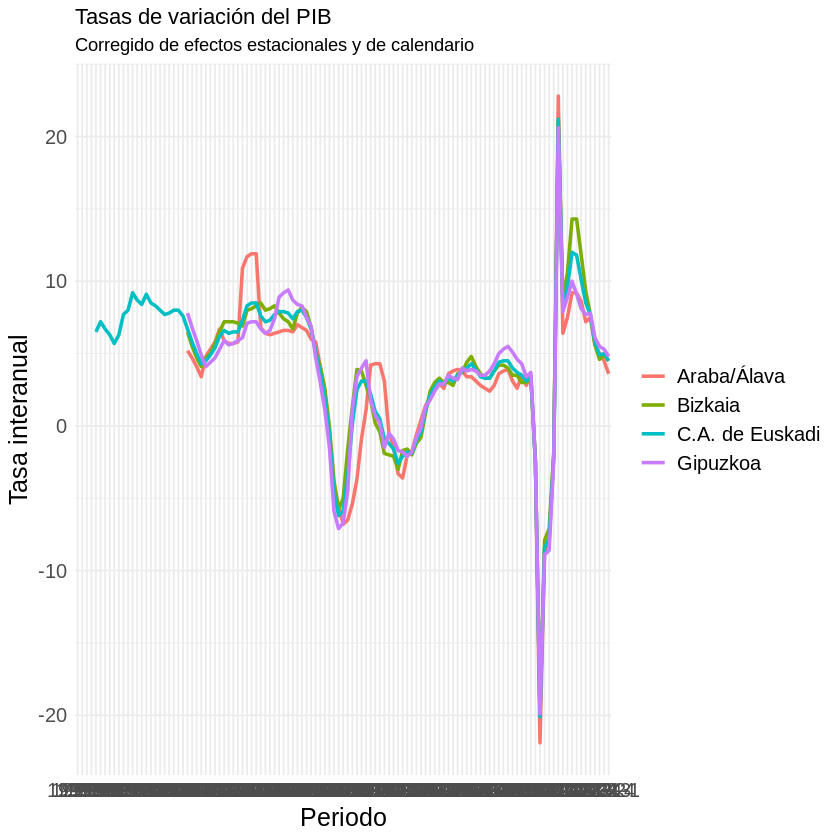

In [12]:
ggplot(PIB, aes(x = periodo, y = value, color = `territorio histórico`, group = `territorio histórico`)) +
  geom_line(size = 1) +
  theme_minimal() +
  theme(
    axis.title = element_text(size = 15),
    axis.text = element_text(size = 12),
    legend.title = element_blank(),
    legend.text = element_text(size = 12) ) +
  labs(
    title = "Tasas de variación del PIB",
    subtitle = "Corregido de efectos estacionales y de calendario",
    x = "Periodo",
    y = "Tasa interanual")

**Guardar los datos**

Finalmente guardamos los datos obtenidos en formato csv, o cualquier otro formato permitido.

In [13]:
write.csv(PIB, file='PIB_trimestral_TH.csv')